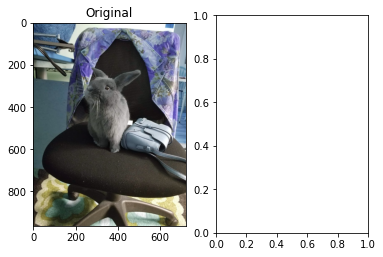

In [5]:
import cv2 as cv
from matplotlib import pyplot as plt

img0 = cv.imread("images_original/20210420_185512.jpg")
img1 = cv.imread("images_original/IMG_20210516_101659172.jpg")
img3 = cv.imread("images_original/IMG_20210521_204633847.jpg")

def k_means(img, k):
    # TODO
    new_image = img
    return new_image

img0_k_means_1 = k_means(img0, 1)

fig, ax = plt.subplots(1, 2)

ax[0].imshow(img0)
ax[0].set_title('Original')
ax[1].imshow(img0_k_means_1)
ax[1].set_title('K-Means k=1')
plt.show()
